In [24]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [12]:
url_cases  = 'https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv'
url_deaths = 'https://coronavirus.data.gov.uk/downloads/csv/coronavirus-deaths_latest.csv'

In [16]:
cases_raw   = requests.get(url_cases).content
cases_csv   = pd.read_csv(io.StringIO(cases_raw.decode('utf-8')))
deaths_raw   = requests.get(url_deaths).content
deaths_csv   = pd.read_csv(io.StringIO(deaths_raw.decode('utf-8')))



In [17]:
cases_csv.head()

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
0,England,E92000001,Nation,2020-08-02,13,0.0,13.0,263602,262746.0,856.0,470.9
1,South West,E12000009,Region,2020-08-02,2,NaN,NaN,13397,NaN,NaN,239.2
2,South East,E12000008,Region,2020-08-02,0,NaN,NaN,35593,NaN,NaN,389.7
3,London,E12000007,Region,2020-08-02,1,NaN,NaN,35706,NaN,NaN,400.8
4,East of England,E12000006,Region,2020-08-02,1,NaN,NaN,24924,NaN,NaN,401.9


In [18]:
deaths_csv.head()

,Area name,Area code,Area type,Reporting date,Daily change in deaths,Cumulative deaths
0,Wales,W92000004,Nation,2020-08-03,0.0,1565
1,Scotland,S92000003,Nation,2020-08-03,0.0,2491
2,Northern Ireland,N92000002,Nation,2020-08-03,0.0,556
3,United Kingdom,K02000001,UK,2020-08-03,9.0,46210
4,England,E92000001,Nation,2020-08-03,9.0,41598


In [19]:
cases_csv.describe()

,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
count,56193.000000,168.000000,168.000000,56193.000000,168.000000,168.000000,56193.000000
mean,18.310626,1563.964286,5.095238,1573.532237,145048.886905,20.130952,277.195636
std,121.979654,1418.841557,30.878987,10129.562185,100471.000801,105.985738,195.415719
min,0.000000,0.000000,-8.000000,1.000000,2.000000,-10.000000,0.000000
25%,2.000000,540.750000,0.000000,178.000000,28077.250000,-3.000000,108.600000
50%,5.000000,939.000000,0.000000,494.000000,180706.500000,0.000000,273.500000
75%,13.000000,2640.000000,2.000000,1065.000000,238825.750000,1.000000,406.300000
max,4796.000000,4796.000000,314.000000,263602.000000,262746.000000,856.000000,1415.500000


In [20]:
deaths_csv.describe()

,Daily change in deaths,Cumulative deaths
count,717.000000,721.000000
mean,128.896792,11961.370319
std,237.849708,16592.485396
min,-10.000000,1.000000
25%,2.000000,537.000000
50%,15.000000,1548.000000
75%,130.000000,28149.000000
max,1173.000000,46210.000000


In [23]:
cases_csv.loc[0:5,['Cumulative lab-confirmed cases','Daily lab-confirmed cases']]

,Cumulative lab-confirmed cases,Daily lab-confirmed cases
0,263602,13
1,13397,2
2,35593,0
3,35706,1
4,24924,1
5,27311,0


In [44]:
cases_csv[1:5]

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
1,South West,E12000009,Region,2020-08-02,2,NaN,NaN,13397,NaN,NaN,239.2
2,South East,E12000008,Region,2020-08-02,0,NaN,NaN,35593,NaN,NaN,389.7
3,London,E12000007,Region,2020-08-02,1,NaN,NaN,35706,NaN,NaN,400.8
4,East of England,E12000006,Region,2020-08-02,1,NaN,NaN,24924,NaN,NaN,401.9


In [57]:
cases_csv.loc[0:25,['Daily lab-confirmed cases']]

,Daily lab-confirmed cases
0,13
1,2
2,0
3,1
4,1
5,0
6,2
7,2
8,4
9,0


In [146]:
sevenDayAv  = np.convolve(vert_values,np.ones(7,)/7, mode='same')
len(sevenDayAv)

168

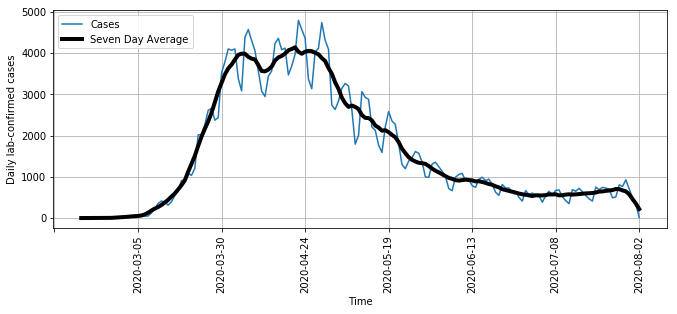

In [153]:
time_axis = cases_csv.loc[cases_csv['Area type']=='Nation',['Specimen date']]
vert_axis = cases_csv.loc[cases_csv['Area type']=='Nation',['Daily lab-confirmed cases']]
time_values = time_axis['Specimen date'];
vert_values = vert_axis['Daily lab-confirmed cases']

sevenDayAv  = np.convolve(vert_values,np.ones(7,)/7, mode='same')

fig = plt.figure(figsize=(11, 4))
ax  = fig.add_subplot(111)
plt.plot(time_values,vert_values,label="Cases")
plt.plot(time_values,sevenDayAv,'k',label="Seven Day Average",linewidth=4)

plt.xlabel('Time')
plt.ylabel('Daily lab-confirmed cases')
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.invert_xaxis()
plt.legend(loc="upper left")
plt.grid()


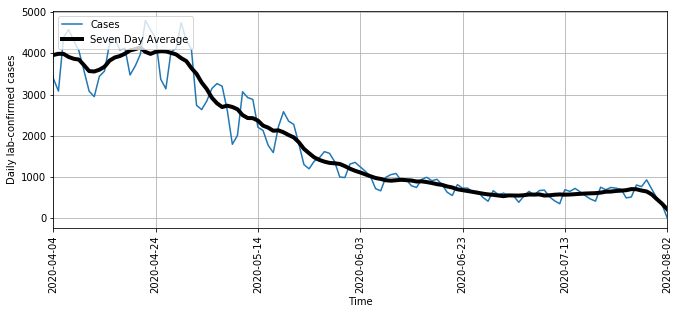

In [170]:
ax.set_xlim(0,120)
ax.invert_xaxis()
fig

In [123]:
time_axis['Specimen date']

0        2020-08-02
474      2020-08-01
685      2020-07-31
946      2020-07-30
1240     2020-07-29
1594     2020-07-28
1910     2020-07-27
2225     2020-07-26
2486     2020-07-25
2761     2020-07-24
3078     2020-07-23
3410     2020-07-22
3734     2020-07-21
4075     2020-07-20
4425     2020-07-19
4656     2020-07-18
4918     2020-07-17
5220     2020-07-16
5535     2020-07-15
5859     2020-07-14
6171     2020-07-13
6493     2020-07-12
6709     2020-07-11
6943     2020-07-10
7236     2020-07-09
7562     2020-07-08
7886     2020-07-07
8194     2020-07-06
8500     2020-07-05
8779     2020-07-04
            ...    
53221    2020-03-17
53542    2020-03-16
53837    2020-03-15
54103    2020-03-14
54340    2020-03-13
54617    2020-03-12
54889    2020-03-11
55115    2020-03-10
55322    2020-03-09
55469    2020-03-08
55552    2020-03-07
55633    2020-03-06
55736    2020-03-05
55813    2020-03-04
55894    2020-03-03
55973    2020-03-02
56033    2020-03-01
56075    2020-02-29
56085    2020-02-28


In [61]:
c.loc[c['Area name']=='Surrey',['Daily lab-confirmed cases']]

,Daily lab-confirmed cases
13,0
486,3
698,5
958,6
1253,6
1607,12
1923,6
2238,4
2499,5
2774,5


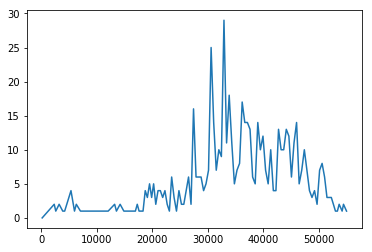

In [65]:
plt.plot(c.loc[c['Area name']=='Mid Sussex',['Daily lab-confirmed cases']])

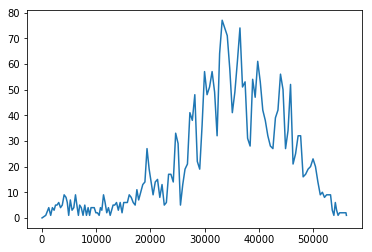

In [67]:
plt.plot(c.loc[c['Area name']=='West Sussex',['Daily lab-confirmed cases']])

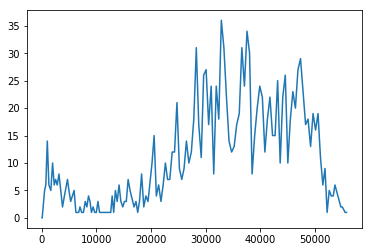

In [69]:
plt.plot(c.loc[c['Area name']=='Coventry',['Daily lab-confirmed cases']])

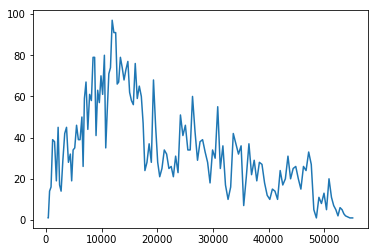

In [76]:
plt.plot(c.loc[c['Area name']=='Leicester',['Daily lab-confirmed cases']])

Text(0,0.5,'Daily lab-confirmed cases')

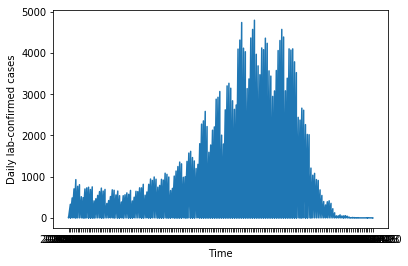

In [101]:
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.plot(c['Specimen date'],c['Daily lab-confirmed cases'])
plt.xlabel('Time')
plt.ylabel('Daily lab-confirmed cases')


#tickValues =np.arange(0,len(c),1000)
#ax.xaxis.set_ticks((tickValues))
#ax.tick_params(axis='x', rotation=90)
#plt.grid()



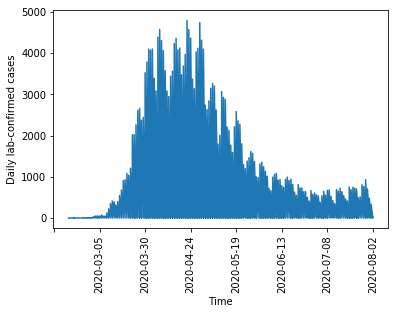

In [108]:

ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.invert_xaxis()
fig


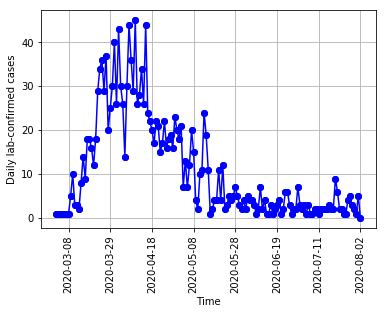

In [142]:
fig = plt.figure()
ax2  = fig.add_subplot(111)
time_axis = c['Area name']=='Ealing'
plt.plot(c.loc[time_axis,'Specimen date'] , c.loc[time_axis,['Daily lab-confirmed cases']],'b-o')
plt.xlabel('Time')
plt.ylabel('Daily lab-confirmed cases')

ax2.tick_params(axis='x', rotation=90)
ax2.xaxis.set_major_locator(ticker.AutoLocator())
ax2.invert_xaxis()
plt.grid()
#fig


In [141]:
len(c.loc[time_axis,['Specimen date']])

294